# Target Marketing

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [134]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
from matplotlib import pyplot

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
from sklearn import preprocessing

In [6]:
import seaborn as sns

In [152]:
trainData = pd.read_csv ("C:\\Users\\akorade1\\Documents\\CIS-508\\Target_Marketing\\Bank_TRAIN.csv")
trainData.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [153]:
testData = pd.read_csv("C:\\Users\\akorade1\\Documents\\CIS-508\\Target_Marketing\\Bank_TEST.csv")

# EDA

In [10]:
TrainData.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       4521.0    41.170095    10.576211    19.0   33.0   39.0    49.0   
balance   4521.0  1422.657819  3009.638142 -3313.0   69.0  444.0  1480.0   
day       4521.0    15.915284     8.247667     1.0    9.0   16.0    21.0   
duration  4521.0   263.961292   259.856633     4.0  104.0  185.0   329.0   
campaign  4521.0     2.793630     3.109807     1.0    1.0    2.0     3.0   
pdays     4521.0    39.766645   100.121124    -1.0   -1.0   -1.0    -1.0   
previous  4521.0     0.542579     1.693562     0.0    0.0    0.0     0.0   

              max  
age          87.0  
balance   71188.0  
day          31.0  
duration   3025.0  
campaign     50.0  
pdays       871.0  
previous     25.0

In [11]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
TrainData.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# there are no null values in the dataset

# checking the outliers in Dataset

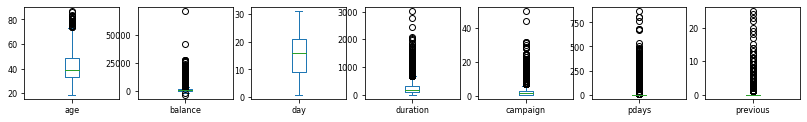

In [13]:
TrainData.plot(kind='box', subplots=True, layout=(10,10), fontsize=8, figsize=(20,20))
pyplot.show()

# Correlation

<AxesSubplot:>

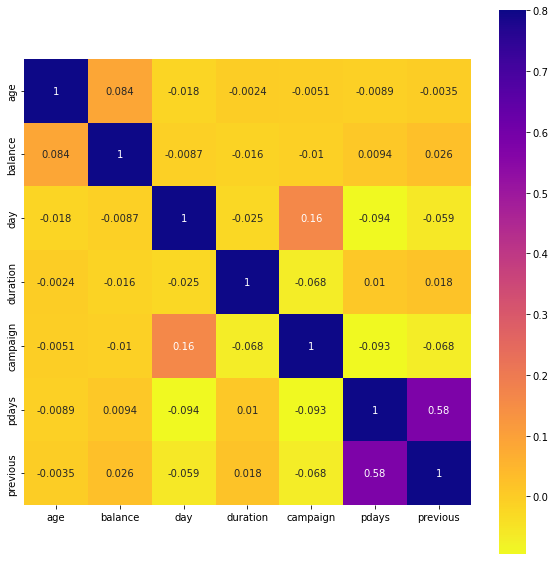

In [14]:
corrmat = TrainData.corr(method='pearson')
f, ax = pyplot.subplots(figsize = (10,10))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True,cmap='plasma_r')

In [ ]:
# none of the variables are highly correlated 


# Subscriber vs Non subscriber

In [16]:
TrainData.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

<AxesSubplot:ylabel='y'>

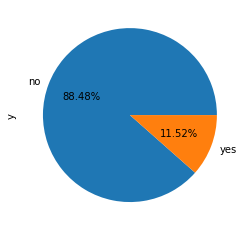

In [17]:
TrainData.y.value_counts().plot.pie(autopct='%1.2f%%')

In [14]:
#there are 88.48% subscribers and 11.52% non subscribers

In [ ]:
# Working with categorical columns in the dataset

In [18]:
TrainData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [150]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [154]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['y']].copy()
print("Train Set shape:")
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData[TestCols[0:len(TestCols)-1]].copy()
Ytest = testData[['y']].copy()
print("Test Set shape:")
print(Xtest.shape)
print(Ytest.shape)

Train Set shape:
(4521, 16)
(4521, 1)
Test Set shape:
(45211, 16)
(45211, 1)


# Categorical Columns

In [155]:
categoricalFeatures = ["job","marital","education","default", "housing", "loan","contact","month","poutcome"]


In [156]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(ohe.fit_transform(Xtrain[categoricalFeatures]),columns=ohe.get_feature_names(),index=Xtrain.index)
Xtrain = pd.concat([Xtrain,Xcat],axis=1)
Xtrain.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtrain.sample(5)

age  balance  day  duration  campaign  pdays  previous  x0_admin.  \
1159   31       62   18       175         1    293         5        0.0   
3912   36       80   30       251         3     -1         0        0.0   
4078   30      562   21       137         4     -1         0        0.0   
1552   33     1998   19       570         1     -1         0        0.0   
814    47      -75    4        57         1    247         1        0.0   

      x0_blue-collar  x0_entrepreneur  ...  x7_jun  x7_mar  x7_may  x7_nov  \
1159             0.0              0.0  ...     0.0     0.0     1.0     0.0   
3912             0.0              0.0  ...     0.0     0.0     1.0     0.0   
4078             0.0              0.0  ...     0.0     0.0     0.0     0.0   
1552             0.0              0.0  ...     0.0     0.0     0.0     1.0   
814              0.0              0.0  ...     0.0     0.0     0.0     0.0   

      x7_oct  x7_sep  x8_failure  x8_other  x8_success  x8_unknown  
1159     0.0     0.0         1.0       0.0         0.0         0.0  
3912     0.0     0.0         0.0       0.0         0.0         1.0  
4078     0.0     0.0         0.0       0.0         0.0         1.0  
1552     0.0     0.0         0.0       0.0         0.0         1.0  
814      0.0     0.0         0.0       1.0         0.0         0.0  

[5 rows x 51 columns]

In [157]:
# OneHotEncoding on Test (only transform)
# OneHotEncoding is to be done on Categorical variables.
Xcat = pd.DataFrame(ohe.transform(Xtest[categoricalFeatures]),columns=ohe.get_feature_names(),index=Xtest.index)
Xtest = pd.concat([Xtest,Xcat],axis=1)
Xtest.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtest.sample(5)

age  balance  day  duration  campaign  pdays  previous  x0_admin.  \
18735   38     1515   31        42         5     -1         0        0.0   
29159   46      469    2        75         1    264        10        1.0   
10958   59     2703   17       249         2     -1         0        0.0   
11662   57      887   20        43         8     -1         0        1.0   
32065   24      448   14       324         1     -1         0        0.0   

       x0_blue-collar  x0_entrepreneur  ...  x7_jun  x7_mar  x7_may  x7_nov  \
18735             0.0              0.0  ...     0.0     0.0     0.0     0.0   
29159             0.0              0.0  ...     0.0     0.0     0.0     0.0   
10958             0.0              0.0  ...     1.0     0.0     0.0     0.0   
11662             0.0              0.0  ...     1.0     0.0     0.0     0.0   
32065             0.0              0.0  ...     0.0     0.0     0.0     0.0   

       x7_oct  x7_sep  x8_failure  x8_other  x8_success  x8_unknown  
18735     0.0     0.0         0.0       0.0         0.0         1.0  
29159     0.0     0.0         0.0       1.0         0.0         0.0  
10958     0.0     0.0         0.0       0.0         0.0         1.0  
11662     0.0     0.0         0.0       0.0         0.0         1.0  
32065     0.0     0.0         0.0       0.0         0.0         1.0  

[5 rows x 51 columns]

# Decision Tree with default parameters

In [158]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [159]:
X_Pred = dt.predict(Xtest)
XPred = dt.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred))
print("Max Depth",dt.get_depth())
print("Leaf",dt.get_n_leaves())
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.8831921435048993
Confusion Matrix for Decision Tree:
[[37216  2706]
 [ 2575  2714]]
Max Depth 26
Leaf 385
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.94      0.93      0.93     39922
         yes       0.50      0.51      0.51      5289

    accuracy                           0.88     45211
   macro avg       0.72      0.72      0.72     45211
weighted avg       0.88      0.88      0.88     45211



# Decision tree classifier - Random Search CV

In [160]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters={'min_samples_leaf' : range(10,300,10),'max_depth': 
            range(5,30,2),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm=dt_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 60, 'max_depth': 5, 'criterion': 'gini'}
accuracy Score for Decision Tree:0.896596
--- 3.387003183364868 seconds ---


# Decision Tree - Grid Search CV

In [161]:
#GRID SEARCH----------------------------------------

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)
grid_parm1=dt_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30}
accuracy Score for Decision Tree:0.896220
--- 90.53009581565857 seconds ---


In [162]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = DecisionTreeClassifier(**grid_parm)
dtGrid = DecisionTreeClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [163]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8965959611598947
Confusion Matrix for Decision Tree:
[[38265  1657]
 [ 3018  2271]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.93      0.96      0.94     39922
         yes       0.58      0.43      0.49      5289

    accuracy                           0.90     45211
   macro avg       0.75      0.69      0.72     45211
weighted avg       0.89      0.90      0.89     45211

[0.64050595 0.63509615 0.63653846 0.68192308 0.64197115]


In [164]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtGrid, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8962199464732035
Confusion Matrix for Decision Tree:
[[38959   963]
 [ 3729  1560]]
              precision    recall  f1-score   support

          no       0.93      0.96      0.94     39922
         yes       0.58      0.43      0.49      5289

    accuracy                           0.90     45211
   macro avg       0.75      0.69      0.72     45211
weighted avg       0.89      0.90      0.89     45211

[0.67133929 0.65264423 0.62336538 0.62629808 0.65639423]


# Random Forest Classifier with default parameters

In [165]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [166]:
X_Pred1 = rf.predict(Xtest)
XPred1 = rf.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred1))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred1))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred1))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred1))

Train Accuracy: 1.0
Test Accuracy: 0.9113711264957643
Confusion Matrix for Decision Tree:
[[39214   708]
 [ 3299  1990]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.74      0.38      0.50      5289

    accuracy                           0.91     45211
   macro avg       0.83      0.68      0.72     45211
weighted avg       0.90      0.91      0.90     45211



# Random Forest - Random Search CV

In [167]:
#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters={'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(1,10,2),'max_features':[10,20,30],'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm=rf_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 40, 'min_samples_leaf': 10, 'max_features': 30, 'max_depth': 9}
accuracy Score for Decision Tree:0.904138
--- 19.3554744720459 seconds ---


# Random Forest Grid Search CV

In [168]:
#GRID SEARCH----------------------------------------

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)
grid_parm1=dt_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30}
accuracy Score for Decision Tree:0.896220
--- 91.28231835365295 seconds ---


In [170]:
#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier 
rfRand = RandomForestClassifier(**grid_parm)
rfGrid = RandomForestClassifier(**grid_parm1)

rfRand.fit(Xtrain,Ytrain)
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain)
rfGrid_predict = rfGrid.predict(Xtest)

In [171]:
# Accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for RF:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9037402402070293
Confusion Matrix for Decision Tree:
[[38916  1006]
 [ 3346  1943]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     39922
         yes       0.66      0.37      0.47      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.67      0.71     45211
weighted avg       0.89      0.90      0.89     45211

[0.65767857 0.67730769 0.64908654 0.62754808 0.65221154]


In [172]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for RF:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.8883899935856319
Confusion Matrix for Decision Tree:
[[39867    55]
 [ 4991   298]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.89      1.00      0.94     39922
         yes       0.84      0.06      0.11      5289

    accuracy                           0.89     45211
   macro avg       0.87      0.53      0.52     45211
weighted avg       0.88      0.89      0.84     45211



# Random Forest with default parameters is the best performing model

In [ ]:
Voice thread link - https://asucarey.voicethread.com/share/20923993/